# 6.5 Unsupervised Machine Learning

### Table of content
#### Import Libraries
#### Import Data
#### Clean Data
##### Create subset
#### The Elbow Technique
#### K-means Clustering
#### Scatterplots
#### Descriptive Statistics

## Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensure the graphs are displayed in notebook

%matplotlib inline

## Import Data

In [3]:
# Path

path = 'C:/Users/micky/OneDrive/Documents/Data Analytics Course/Data Immersion/Achievement 6'

In [4]:
# Import citbike_clean

cb_df = pd.read_csv(os.path.join(path, 'Citibike Project', 'Data', 'citibike_filtered_clean.csv'))

In [5]:
# Check data

cb_df.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,subscriber,birth_year,gender,start_station_coords,end_station_coords,trip_length,start_date,start_time,end_date,end_time
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,...,Subscriber,1968.0,2,"-73.99138152, 40.75466591","-73.99726235, 40.74238787",10-20 min,2013-09-09,18:18,2013-09-09,18:35
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,...,Subscriber,1983.0,1,"-74.00247214, 40.71939226","-73.98713956, 40.7284186",Under 10 min,2013-09-12,18:38,2013-09-12,18:48
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,...,Subscriber,1989.0,1,"-73.9912551, 40.76019252","-73.988639, 40.768254",Under 10 min,2013-09-18,19:44,2013-09-18,19:50
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,...,Subscriber,1988.0,2,"-73.97434726, 40.74315566","-73.967416, 40.756014",Under 10 min,2013-09-28,11:54,2013-09-28,12:03
4,5,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,...,Subscriber,1986.0,2,"-73.9907647, 40.73028666","-73.98379855, 40.72621788",Under 10 min,2013-09-27,22:01,2013-09-27,22:08


## Clean Data

In [14]:
# Column info

cb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47912 entries, 0 to 47911
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day_of_week              47912 non-null  object 
 1   start_hour               47912 non-null  int64  
 2   start_station_id         47912 non-null  int64  
 3   start_station_name       47912 non-null  object 
 4   start_station_latitude   47912 non-null  float64
 5   start_station_longitude  47912 non-null  float64
 6   end_station_id           47912 non-null  int64  
 7   end_station_name         47912 non-null  object 
 8   end_station_latitude     47912 non-null  float64
 9   end_station_longitude    47912 non-null  float64
 10  trip_duration            47912 non-null  int64  
 11  subscriber               47912 non-null  object 
 12  birth_year               47912 non-null  float64
 13  gender                   47912 non-null  int64  
 14  start_station_coords  

In [6]:
# Check columns

cb_df.columns

Index(['Unnamed: 0', 'day_of_week', 'start_hour', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_station_coords',
       'end_station_coords', 'trip_length', 'start_date', 'start_time',
       'end_date', 'end_time'],
      dtype='object')

In [7]:
# Drop Unnamed: 0

cb_df = cb_df.drop(columns = ['Unnamed: 0'])

### Create a Subset

In [18]:
# Create set subset

set = cb_df[['start_hour', 'trip_duration', 'gender']]

In [19]:
set.columns

Index(['start_hour', 'trip_duration', 'gender'], dtype='object')

## The Elbow Technique

In [8]:
# Define the range of potential clusters in the data

num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above

kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [20]:
# Create a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(set).score(set) for i in range(len(kmeans))] 

score

C:\Users\micky\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\micky\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\micky\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\micky\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\micky\anaconda3\lib\site-packages\sklearn\clust

[-10177520531.361221,
 -2930202341.438824,
 -1411779448.371849,
 -825926029.8946316,
 -532560304.1501003,
 -377962516.5803882,
 -282124333.1655375,
 -218709128.7983417,
 -174677902.40198866]

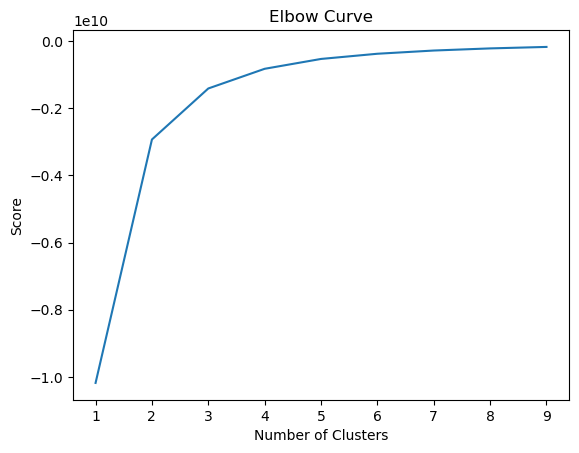

In [21]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### We can see that the elbow, or where the curve flattens, starts about 3 and only has a slight increase from 3 to 4. Which is why the optimal number of clusters is 3.

## K-means Clustering

In [24]:
# Create the k-means object with 3 clusters

kmeans = KMeans(n_clusters = 3)

In [28]:
# Fit the k-means object to the data

kmeans.fit(set)

C:\Users\micky\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [30]:
set['clusters'] = kmeans.fit_predict(set)

C:\Users\micky\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\micky\AppData\Local\Temp\ipykernel_12260\1098800083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set['clusters'] = kmeans.fit_predict(set)


In [31]:
set.head()

,start_hour,trip_duration,gender,clusters
0,18,993,2,1
1,18,581,1,0
2,19,361,1,0
3,11,561,2,0
4,22,427,2,0


In [32]:
# Check the frequency of each unique value in the 'clusters' column

set['clusters'].value_counts()

0    24399
1    15471
2     8042
Name: clusters, dtype: int64

## Scatterplots

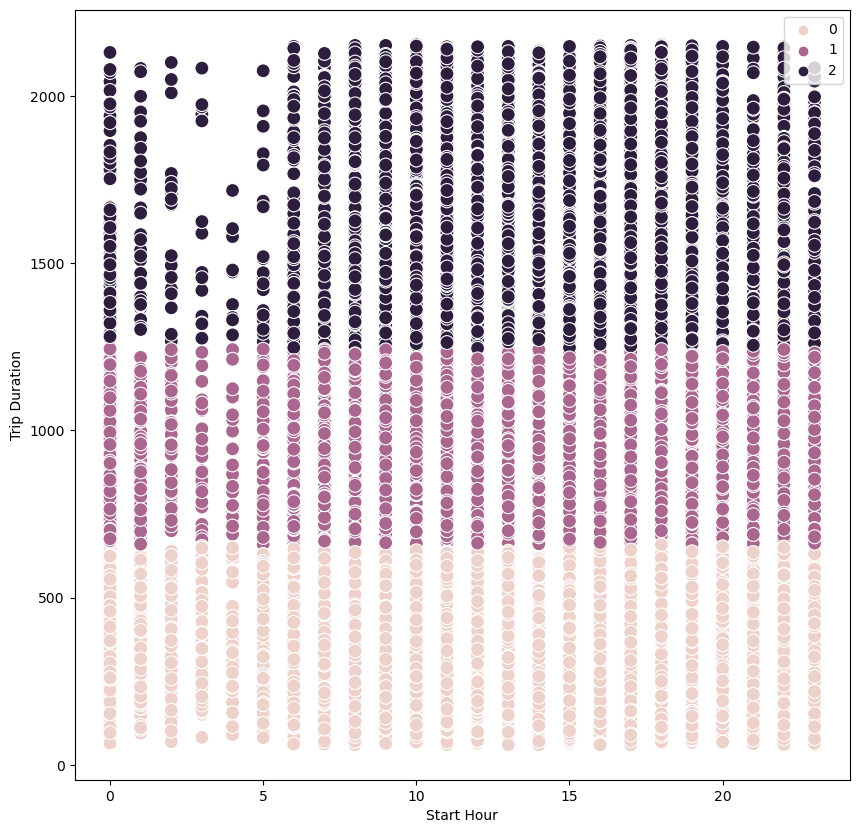

In [34]:
# Plot the clusters for the "start_hour" and "trip_duration" variables

plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = set['start_hour'], y = set['trip_duration'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration')
plt.show()

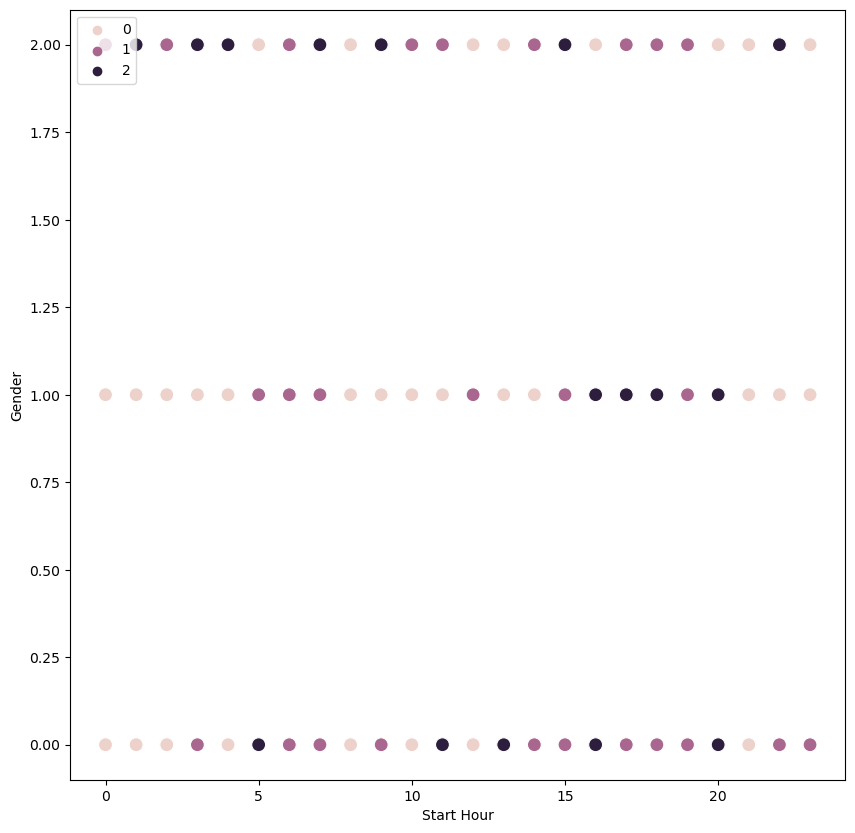

In [35]:
# Plot the clusters for the "start_hour" and "gender" variables

plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = set['start_hour'], y = set['gender'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Start Hour')
plt.ylabel('Gender')
plt.show()

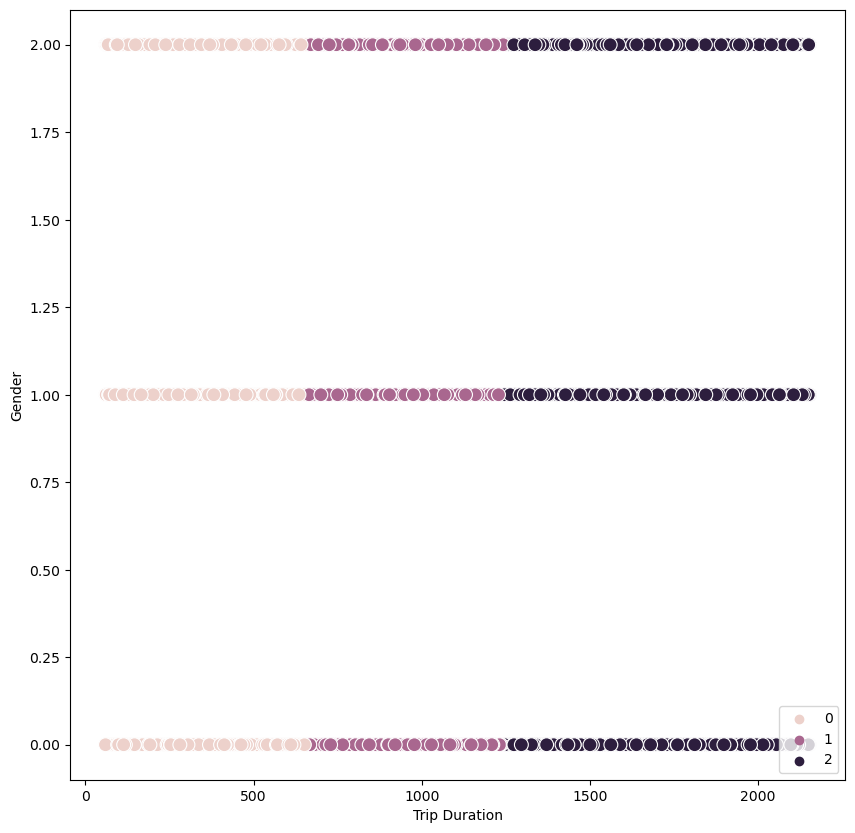

In [36]:
# Plot the clusters for the "trip_duration" and "gender" variables

plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = set['trip_duration'], y = set['gender'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Trip Duration')
plt.ylabel('Gender')
plt.show()

##### It's safe to assume that the darkest section is provided with the results of the longer trips. While purple is the medium lengthed trips, and pink is the shorter trips.
##### These scatterplots also show that gender has no association with trip duration or the time a ride starts.
##### These scatterplots also provide information showing that longer trips are more typical at later hours of the day, however, trips are pretty evenly distrbuted across all hours of the day.

## Descriptive Statistics

In [37]:
set.loc[set['clusters'] == 2, 'cluster'] = 'dark'
set.loc[set['clusters'] == 1, 'cluster'] = 'purple'
set.loc[set['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\micky\AppData\Local\Temp\ipykernel_12260\1982604775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set.loc[set['clusters'] == 2, 'cluster'] = 'dark'


In [38]:
set.groupby('cluster').agg({'trip_duration':['mean', 'median'], 
                         'start_hour':['mean', 'median'], 
                         'gender':['mean', 'median']})

trip_duration         start_hour           gender       
                 mean  median       mean median      mean median
cluster                                                         
dark      1579.702562  1531.0  14.542154   15.0  0.934345    1.0
pink       407.805771   411.0  13.934096   15.0  1.138858    1.0
purple     907.671191   887.0  14.253377   15.0  1.082929    1.0

##### With these statistics provided, it proves that the darkest cluter provides the longest trips, with purple having the medium length trips, and pink provides the shortest trips.
##### Starting hour is even across all three clusters, with pink providing more of the earlier houred trips.
#### Gender also remains pretty equal across all clusters
##### Overall, there is still some limitations in this analysis. If more columns were available for this kind of analysis, then we would have more exciting outcomes and a more accurate conclusion.